<a href="https://colab.research.google.com/github/bhuwich/Tensorflow/blob/main/SimpleTensorflowClassificationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_0 = np.random.randn(100, 2)
t_0 = np.array([-1]*100)
x_1 = np.random.randn(100,2) + 3
t_1 = np.array([1]*100)

x = np.append(x_0,x_1, axis =0)
t = np.append(t_0,t_1, axis =0)
print(x.shape, t.shape)

(200, 2) (200,)


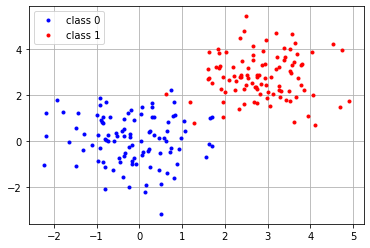

In [ ]:
plt.plot(x[t==-1,0],x[t==-1,1], 'b.')
plt.plot(x[t==1,0],x[t==1,1], 'r.')
plt.grid()
plt.legend(['class 0','class 1'])

In [ ]:
inputs = tf.keras.Input(shape=(2,))
y = tf.keras.layers.Dense(1, activation='tanh')(inputs)
model = tf.keras.Model(inputs=inputs, outputs=y)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x,t,epochs=100)

RuntimeError: ignored

In [ ]:
model.variables

In [ ]:
w_1 = model.variables[0][0][0].numpy()
w_2 = model.variables[0][1][0].numpy()
b = model.variables[1][0].numpy()
print(w_1,w_2,b)

In [ ]:
slope = -w_2/w_1
bias = -b/w_2
plt.plot(x[t==-1,0], x[t==-1,1], 'b.')
plt.plot(x[t==1,0], x[t==1,1], 'r.')
plt.plot(np.arange(-2,5), slope*np.arange(-2,5)+ bias, 'k-')
plt.grid()
plt.legend(['class 0', 'class 1'])

In [ ]:
class ParabolaLayer(tf.keras.layers.Layer):
  def __init__(self):
    super(ParabolaLayer, self).__init__()
    self.a =  tf.Variable(np.random.randn(1).astype(np.float32))
    self.b = tf.Variable(np.random.randn(1).astype(np.float32))
    self.c = tf.Variable(np.random.randn(1).astype(np.float32))

    def call(self, x):
      return self.a*tf.square(x[:,1:2]) + self.b*x[:,0:1] + self.c - x[:,0:1]

NameError: ignored

In [ ]:
parabola_layer = ParabolaLayer()

In [ ]:
inputs = tf.keras.Input(shape=(2,))
y = parabola_layer(inputs)
out = tf.keras.layers.Activation('tanh')(y)
model = tf.keras.Model(inputs=inputs,outputs=y)
model.summary()

In [ ]:
a = tf.Variable(np.random.randn(1).astype(np.float32))
b = tf.Variable(np.random.randn(1).astype(np.float32))
c = tf.Variable(np.random.randn(1).astype(np.float32))

In [ ]:

epochs = 1000
lr = 10
for epoch in range(epochs):
  with tf.GradientTape() as tape:
    y = tf.tanh(a*tf.square(x[:,0].astype(np.float32)) + b*x[:,0].astype(np.float32) + c - x[:,1].astype(np.float32))
    loss = tf.reduce_mean(tf.square(y-t))
  g_a ,g_b, g_c = tape.gradient(loss, [a,b,c])
  a.assign_sub(lr*g_a)
  b.assign_sub(lr*g_b)
  c.assign_sub(lr*g_c)
  print(epoch,loss.numpy())

0 1.869658
1 1.3975134
2 0.967726
3 0.76269966
4 0.65239686
5 0.566185
6 0.5408206
7 0.51133245
8 0.5100766
9 0.4953158
10 0.4923745
11 0.4843904
12 0.47707534
13 0.47454318
14 0.47234416
15 0.47039208
16 0.46854797
17 0.46688506
18 0.46528527
19 0.46385747
20 0.46254265
21 0.46137854
22 0.46035874
23 0.45945805
24 0.45863152
25 0.4578203
26 0.4569748
27 0.45603576
28 0.45491627
29 0.4535296
30 0.45199364
31 0.45064026
32 0.44947174
33 0.44838202
34 0.44731566
35 0.44626376
36 0.44523802
37 0.4442903
38 0.44364822
39 0.4445015
40 0.44792452
41 0.45329654
42 0.44112232
43 0.43996242
44 0.4404967
45 0.44586986
46 0.44591278
47 0.45157325
48 0.43792844
49 0.44124472
50 0.44671968
51 0.43945602
52 0.44784203
53 0.4342025
54 0.4402883
55 0.45508504
56 0.44801834
57 0.43408397
58 0.43802232
59 0.44856757
60 0.43102336
61 0.43093097
62 0.43828887
63 0.45200035
64 0.4324173
65 0.44496846
66 0.43430626
67 0.44931084
68 0.42877877
69 0.4387513
70 0.44872868
71 0.42610466
72 0.42636353
73 0.43657

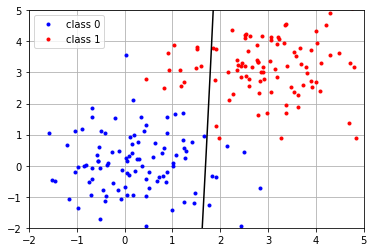

In [ ]:
x_tmp = np.arange(-2,5,0.1)
plt.plot(x[t==-1,0], x[t==-1,1], 'b.')
plt.plot(x[t==1,0], x[t==1,1], 'r.')
plt.plot(x_tmp, a*(x_tmp**2)+b*x_tmp+c, 'k-')
plt.grid()
plt.xlim([-2,5])
plt.ylim([-2,5])
plt.legend(['class 0', 'class 1'])